In [16]:
'''
April 2, 2019

Just how well-posed is the system of coupled Van der Pol oscillators?
'''

'\nApril 2, 2019\n\nJust how well-posed is the system of coupled Van der Pol oscillators?\n'

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.optimize import dual_annealing
from scipy.optimize import least_squares

In [18]:

# Adapting coupled springs.
# From personal notebook, March 24

N = 5 # number of masses (may accidentally call this the number of springs)

''' Changed the value of d so the oscillators do not move past each other.'''
d = 6. # distance between rest positions (uniform)
k = np.pi # spring const

# generalize to allow different spring constants on different springs..
K = np.ones(N) * k

x0 = 0. # LHS resting board is at position x0

# set rest positions of springs + boards
R = np.arange(0, d *(N + 1 + 1), d, dtype=np.float_)

# set initial positions of springs
X = np.copy(R)
X[1] -= 0.8 
X[2] -= 0.4

DX = X - R

''' Think that my acceleration formula changes quite a bit '''
MU = np.ones(N)
F_accel = lambda DX, XV: -K * (DX[1:-1] - DX[:-2]) + K * (DX[2:] - DX[1:-1]) + MU * (1 - np.power(DX[1:-1], 2)) * XV[N:]

# old formula (springs)
#F_accel = lambda DX: -K * (DX[1:-1] - DX[:-2]) + K * (DX[2:] - DX[1:-1])



DX

# old.
# F_accel(DX) # looks okay.

# Set up the linear system.
XV = np.zeros(2 * N)

# Initial conditions?
XV[:N] = X[1:-1] # Initial positions of the springs
XV[N:] = np.zeros(N) # initial velocities of the springs

# Although this is an autonomous system
''' This should mostly be the same though? '''
def F(t, XV):
    
    DX = np.hstack( ([0.], XV[:N], [X[-1]]) ) - R 
    # ''' Changed the last arg in the list to hopefully unbreak the case when d neq 1.'''
    
    res = np.hstack(( XV[N:], F_accel(DX, XV) ) # '''Changed the args to F_accel.'''
                    )
    return res

F(0, XV)

t0, tf = 0., 30.
nframes = 2 ** 12

# set the initial condition...
IC = XV

soln = solve_ivp(F, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes))

'''
Hey, it looks like I was able to modify the code with no syntax errors! Let's see how the solution behaves...

'''

"\nHey, it looks like I was able to modify the code with no syntax errors! Let's see how the solution behaves...\n\n"

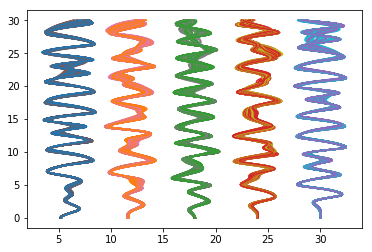

In [19]:


for i in range(N):
    plt.plot( soln.y[i, :], soln.t )
plt.savefig('assets/vdp_ic.png', dpi=256)


solns = []
neps = 2 ** 4
eps_size = 0.05
for epsx in np.linspace(-eps_size, eps_size, neps):
    for epsy in np.linspace(-eps_size, eps_size, neps):
        XV[:N] = X[1:-1] + epsx # not really perfect since we're perturbing all of the springs uniformly but oh well
        XV[N:] = np.zeros(N) + epsy
        
        solns.append(solve_ivp(F, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes)))
        
for soln in solns:
    for i in range(N):
        plt.plot(soln.y[i, :], soln.t )

plt.savefig('assets/vdp_well_posed.png', dpi=256)